In [ ]:
!pip install opendatasets
!pip install pandas
import opendatasets as od
import pandas
# importo il dataset dal seguente link
od.download('https://www.kaggle.com/datasets/puneet6060/intel-image-classification/data')


Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: leomanna
Your Kaggle Key: ··········
Dataset URL: https://www.kaggle.com/datasets/puneet6060/intel-image-classification


100%|██████████| 346M/346M [00:12<00:00, 29.5MB/s]


In [ ]:
#installo le librerie per poter inserire i tag nei metadati exif nel mio dataset
!pip install piexif
!pip install ExifRead
import piexif
import exifread
import piexif.helper
from PIL import Image
import numpy as np
import os
import PIL
import PIL.Image
import pathlib

data_dir='/content/intel-image-classification/seg_train/seg_train/'
data_dir = pathlib.Path(data_dir).with_suffix('')
#definisco le classi che l' algoritmo di machine learning dovrà predirre
classes=['buildings','forest']
# selezione le prime 1000 immagine inserendo il commento "riproducibile", mentre per le restanti il commento "copia negata"
for c in classes:
 path='/content/sample_data/dataset/'+str(c)+'/'
 os.makedirs(path, exist_ok=True)
 new_classes = list(data_dir.glob(str(c)+'/*'))
 i=0
 for r in new_classes:
  img=PIL.Image.open(str(r))
  exif_dict = piexif.load(img.info['exif']) if 'exif' in img.info else {'0th': {}, 'Exif': {}, 'GPS': {}, '1st': {}, 'thumbnail': None}
  if i < 1000:
    user_comment = piexif.helper.UserComment.dump(str("riproducibile"))
    exif_dict["Exif"][piexif.ExifIFD.UserComment] = user_comment
    exif_bytes = piexif.dump(exif_dict)

  else:
    user_comment = piexif.helper.UserComment.dump(str("diritto d'autore: copia negata"))
    exif_dict["Exif"][piexif.ExifIFD.UserComment] = user_comment
    exif_bytes = piexif.dump(exif_dict)
  i=i+1
  img.save(str(path+str(i)+'.jpg'),exif=exif_bytes)

In [ ]:
path_img_scaricata='/content/sample_data/foresta1111 (1).jpg'
img=PIL.Image.open(path_img_scaricata)
img.save('/content/sample_data/dataset/forest/intruso.jpg')

In [ ]:
#costruisco un nuovo dataset che abbia solamente le immagini con il commento "riproducibile"
sspath='/content/sample_data/dataprocess/'
data_dire='/content/sample_data/dataset/'
data_dire = pathlib.Path(data_dire).with_suffix('')
for c in classes:
 path='/content/sample_data/dataset/'+str(c)+'/'
 spath=sspath+str(c)+'/'
 os.makedirs(spath, exist_ok=True)
 new_classes = list(data_dire.glob(str(c)+'/*'))
 i=0
 for r in new_classes:
  f = open(str(r), 'rb')
  tags = exifread.process_file(f)
  user_comment = tags.get('EXIF UserComment', None)
  user_comment=str(user_comment)
  if user_comment == str("riproducibile"):
     img=PIL.Image.open(str(r))
     i=i+1
     img.save(str(spath+str(i)+'.jpg'))


In [ ]:
import os
folder_path = '/content/sample_data/dataprocess/forest'
image_count = len([f for f in os.listdir(folder_path)])
print(image_count)

1000


In [ ]:
# costruisco il dataset di training e di validation solamente con il dataset che ha le immagine con il tag "riproducibile"
import tensorflow as tf
import tensorflow_datasets as tfds
batch_size = 32
img_height = 228
img_width = 228

data_dir='/content/sample_data/dataprocess'

train_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

val_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

class_names = train_ds.class_names



Found 2000 files belonging to 2 classes.
Using 1600 files for training.
Found 2000 files belonging to 2 classes.
Using 400 files for validation.


(32, 228, 228, 3)
(32,)
Epoch 1/15
50/50 ━━━━━━━━━━━━━━━━━━━━ 121s 2s/step - accuracy: 0.6231 - loss: 0.9667 - val_accuracy: 0.8725 - val_loss: 0.3318
Epoch 2/15
50/50 ━━━━━━━━━━━━━━━━━━━━ 113s 2s/step - accuracy: 0.8778 - loss: 0.3054 - val_accuracy: 0.8975 - val_loss: 0.2192
Epoch 3/15
50/50 ━━━━━━━━━━━━━━━━━━━━ 119s 2s/step - accuracy: 0.9074 - loss: 0.2365 - val_accuracy: 0.9450 - val_loss: 0.1255
Epoch 4/15
50/50 ━━━━━━━━━━━━━━━━━━━━ 117s 2s/step - accuracy: 0.9120 - loss: 0.2232 - val_accuracy: 0.9375 - val_loss: 0.1299
Epoch 5/15
50/50 ━━━━━━━━━━━━━━━━━━━━ 114s 2s/step - accuracy: 0.9392 - loss: 0.1628 - val_accuracy: 0.9650 - val_loss: 0.1062
Epoch 6/15
50/50 ━━━━━━━━━━━━━━━━━━━━ 115s 2s/step - accuracy: 0.9618 - loss: 0.1068 - val_accuracy: 0.9375 - val_loss: 0.1475
Epoch 7/15
50/50 ━━━━━━━━━━━━━━━━━━━━ 141s 2s/step - accuracy: 0.9594 - loss: 0.0975 - val_accuracy: 0.9525 - val_loss: 0.1201
Epoch 8/15
50/50 ━━━━━━━━━━━━━━━━━━━━ 121s 2s/step - accuracy: 0.9712 - loss: 0.0869 - 

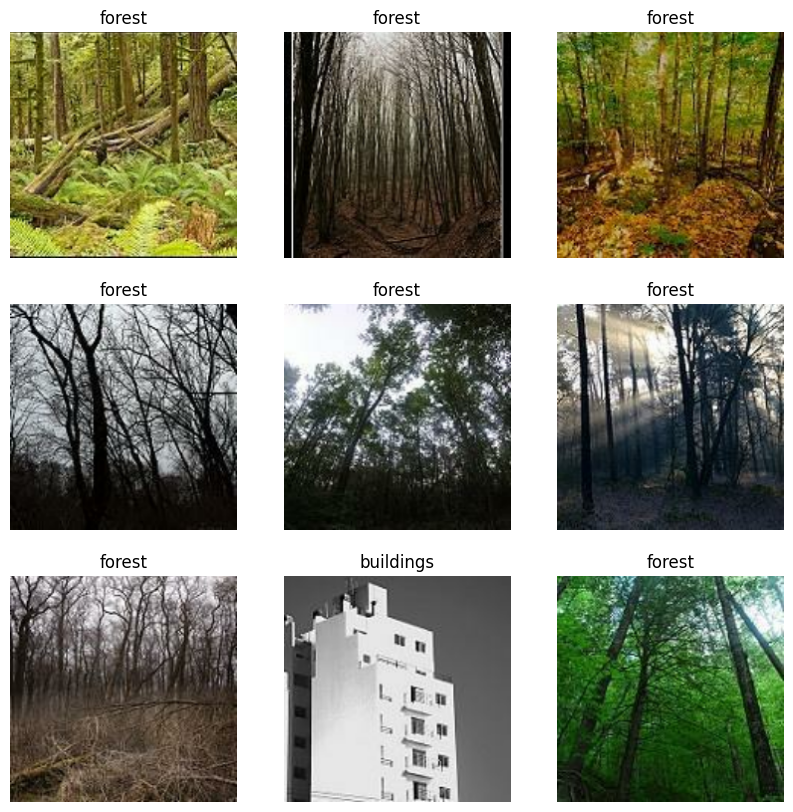

In [ ]:
# creo e addestro il modello
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

for image_batch, labels_batch in train_ds:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

normalization_layer = tf.keras.layers.Rescaling(1./255)
normalized_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
image_batch, labels_batch = next(iter(normalized_ds))
first_image = image_batch[0]
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)
num_classes = 2

model = tf.keras.Sequential([
  tf.keras.layers.Rescaling(1./255),
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(num_classes)
])

model.compile(
  optimizer='adam',
  loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
  metrics=['accuracy'])

history=model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=15
)

In [ ]:
!mkdir -p saved_model
model.save('/content/sample_data/saved_model/my_model12.keras')


In [ ]:
# faccio una predizione di un immagine
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt

filename='/content/sample_data/dataprocess/forest/931.jpg'
def predict_image(filename, model):
    img_ = image.load_img(filename, target_size=(228, 228))
    img_array = image.img_to_array(img_)
    img_processed = np.expand_dims(img_array,0)
    predictions = model.predict(img_processed)
    score = tf.nn.softmax(predictions[0])
    index = np.argmax(score)


    print(str(class_names[index]))

predict_image(filename, model)




NameError: name 'model' is not defined